In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pylab as plt
import lsst.all_sky_phot.wcs as asp
from read_stars import read_manual_stars
from scipy.optimize import minimize
from astropy.io import fits

In [2]:
# Read in stars measured off several exposures
stars = read_manual_stars('starcoords.dat')
stars

If you need enough precision such that this matters (~<10 arcsec), you can
use the latest IERS predictions by running:

    >>> from astropy.utils import iers
    >>> iers.IERS.iers_table = iers.IERS_A.open(iers.IERS_A_URL)

 [astropy.coordinates.builtin_frames.utils]
If you need enough precision such that this matters (~<10 arcsec), you can
use the latest IERS predictions by running:

    >>> from astropy.utils import iers
    >>> iers.IERS.iers_table = iers.IERS_A.open(iers.IERS_A_URL)

 [astropy.coordinates.builtin_frames.utils]


array([ ('Achernar', 3441.0, 2918.0, 57415.03236111111, 49.947050461141515, 215.1280625253878),
       ('Achernar', 3576.0, 3018.0, 57415.06576388889, 43.715460044327585, 217.98734214492922),
       ('Betelgeuse', 2123.0, 971.0, 57415.01190972222, 43.319872170968644, 40.984431336638984),
       ('Betelgeuse', 2330.0, 956.0, 57415.03236111111, 47.122656796538564, 32.091831385823845),
       ('Betelgeuse', 2677.0, 949.0, 57415.06576388889, 51.30177229534061, 14.886238412655885),
       ('Canopus', 2221.0, 2671.0, 57415.01190972222, 55.59320568854928, 141.12216403321605),
       ('Canopus', 2338.0, 2640.0, 57415.03236111111, 59.417680615391944, 145.4395870063344),
       ('Canopus', 2539.0, 2609.0, 57415.06576388889, 64.53278238450694, 156.57094949814072),
       ('Procyon', 1418.0, 1164.0, 57415.01190972222, 26.77820616264145, 65.70791797900411),
       ('Procyon', 1610.0, 1115.0, 57415.03236111111, 32.46281914154827, 60.339168551036586),
       ('Procyon', 1935.0, 1053.0, 57415.06576388

Try out a simple Zenith Equal Area Projection

In [3]:
fun = asp.wcs_zea(stars['x'], stars['y'], stars['alt'], stars['az'], crpix1=2.87356521e+03, crpix2=1.98559533e+03)
#x0 = [np.median(stars['x']), np.median(stars['y']), 0.1, 0.1, 1., 0., 0., 1.]
x0 = np.array([2.87356521e+03,   1.98559533e+03,  1., 1., .036,
        0.0027,  0.00295,   -0.0359])

In [4]:
fit_result = minimize(fun, x0)

In [5]:
fit_result

      fun: 1184.2829398597771
 hess_inv: array([[  5.38528833e-02,   1.62285632e-04,  -5.07780174e-04,
          1.19876948e-03,   1.58117004e-05,   1.58946246e-06,
         -3.77838428e-06,   4.41591861e-05],
       [  1.62284320e-04,   5.63527268e-02,  -2.10526380e-04,
          4.32048259e-04,   7.17945463e-06,   5.70806957e-07,
          7.18994385e-07,   1.55968044e-05],
       [ -5.07780069e-04,  -2.10526260e-04,   1.87764664e-04,
         -2.79358880e-04,  -6.42055312e-06,  -5.00510425e-07,
          8.37660240e-07,  -1.03106291e-05],
       [  1.19876958e-03,   4.32048317e-04,  -2.79358877e-04,
          5.70534334e-04,   9.50832644e-06,   7.46487841e-07,
         -1.70532049e-06,   2.10115157e-05],
       [  1.58116968e-05,   7.17945058e-06,  -6.42055312e-06,
          9.50832653e-06,   2.19671344e-07,   1.70401371e-08,
         -2.85050304e-08,   3.50943513e-07],
       [  1.58946207e-06,   5.70806432e-07,  -5.00510420e-07,
          7.46487854e-07,   1.70401369e-08,   1.4392

In [6]:
wcs = fun.return_wcs(fit_result.x)
wcs.to_header(relax=True)

WCSAXES =                    2 / Number of coordinate axes                      
CRPIX1  =      2874.5646562968 / Pixel coordinate of reference point            
CRPIX2  =      1986.5953076882 / Pixel coordinate of reference point            
PC1_1   =    0.035223136262867 / Coordinate transformation matrix element       
PC1_2   =   0.0027089859279465 / Coordinate transformation matrix element       
PC2_1   =   0.0029855203345702 / Coordinate transformation matrix element       
PC2_2   =   -0.036377547238862 / Coordinate transformation matrix element       
CDELT1  =      1.0174152494491 / [deg] Coordinate increment at reference point  
CDELT2  =     0.98849434046903 / [deg] Coordinate increment at reference point  
CUNIT1  = 'deg'                / Units of coordinate increment and value        
CUNIT2  = 'deg'                / Units of coordinate increment and value        
CTYPE1  = 'RA---ZEA-SIP'       / TAN (gnomonic) projection + SIP distortions    
CTYPE2  = 'DEC--ZEA-SIP'    

In [7]:
header = wcs.to_header(relax=True)
hdu = fits.PrimaryHDU(header=header)
hdu.writeto('wcs_zea_only.fits')

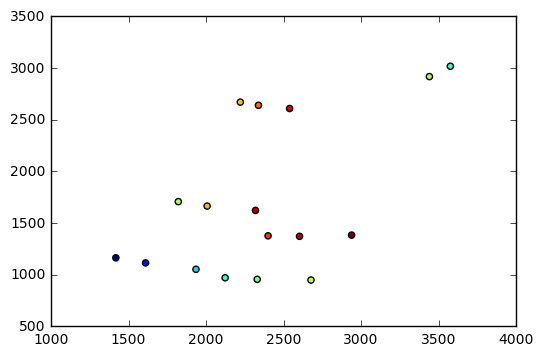

In [8]:
plt.scatter(stars['x'], stars['y'], c=stars['alt'])

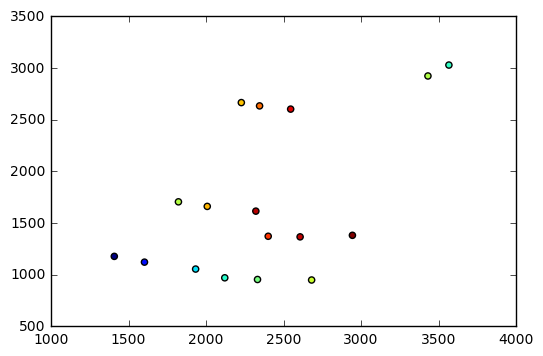

In [9]:
fit_x, fit_y = wcs.all_world2pix(stars['az'], stars['alt'], 0)
plt.scatter(fit_x, fit_y, c=stars['alt'])

In [10]:
fit_result.x

array([  2.87456466e+03,   1.98659531e+03,   1.01741525e+00,
         9.88494340e-01,   3.52231363e-02,   2.70898593e-03,
         2.98552033e-03,  -3.63775472e-02])

In [11]:
x0

array([  2.87356521e+03,   1.98559533e+03,   1.00000000e+00,
         1.00000000e+00,   3.60000000e-02,   2.70000000e-03,
         2.95000000e-03,  -3.59000000e-02])

In [12]:
fun = asp.wcs_azp(stars['x'], stars['y'], stars['alt'], stars['az'])
print fun.b_ind

[19 20 21 22 23 24 25 26 27]


In [13]:
# Fit a projection + affine transform (no distortions)
fun = asp.wcs_azp(stars['x'], stars['y'], stars['alt'], stars['az'], crpix1=2.87356521e+03, crpix2=1.98559533e+03)
x0 = np.array([2.87356521e+03,   1.98559533e+03,  1., 1., .036,
        0.0027,  0.00295,   -0.0359, 50., 20.])
#x0[0:2] += 1.
#x0[2:6] = [1., 0., 0., 1.]
# x0[0:10] = [ 2.87356521e+03, 1.98559533e+03, 20,20, -2.77295650e+01, -2.12539223e+00,  -2.27577547e+00,   2.76348359e+01, 2.6, -10.]
fit_result = minimize(fun, x0)
print fit_result.x
print fit_result.fun

[  2.87267194e+03   1.98194944e+03   1.23546388e+00   1.02932540e+00
   2.91681385e-02   2.20383040e-03   2.77018818e-03  -3.50779379e-02
   2.59333243e+00  -1.99433904e+00]
1112.1880617


-0.000585572384553 3.87787738811
0.000188566522852 7.09823173356


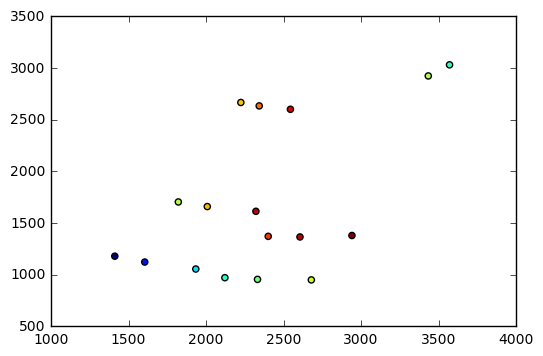

In [14]:
wcs = fun.return_wcs(fit_result.x)
fit_x, fit_y = wcs.all_world2pix(stars['az'], stars['alt'], 0)
plt.scatter(fit_x, fit_y, c=stars['alt'])
print np.mean(fit_x-stars['x']), np.std(fit_x-stars['x'])
print np.mean(fit_y-stars['y']), np.std(fit_y-stars['y'])

In [15]:
header = wcs.to_header(relax=True)
hdu = fits.PrimaryHDU(header=header)
hdu.writeto('wcs_asp_only.fits')

In [16]:
x0 = np.array([2.87356521e+03,   1.98559533e+03,  1., 1., .036,
        0.0027,  0.00295,   -0.0359, 50., 20.])
x0 = np.concatenate((fit_result.x, np.zeros(18)*1e-3))

In [17]:
x0

array([  2.87267194e+03,   1.98194944e+03,   1.23546388e+00,
         1.02932540e+00,   2.91681385e-02,   2.20383040e-03,
         2.77018818e-03,  -3.50779379e-02,   2.59333243e+00,
        -1.99433904e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00])

In [18]:
# When all else fails, just randomly try out different solvers until one manages to interate!
fit_result = minimize(fun, x0, method='Powell')
fit_result.x

/Users/yoachim/lsst/DarwinX86/miniconda2/3.19.0.lsst4/lib/python2.7/site-packages/scipy/optimize/optimize.py:1850: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)
/Users/yoachim/lsst/DarwinX86/miniconda2/3.19.0.lsst4/lib/python2.7/site-packages/scipy/optimize/optimize.py:1851: RuntimeWarning: invalid value encountered in double_scalars
  p = (x - v) * tmp2 - (x - w) * tmp1


array([  2.86838633e+03,   1.98672235e+03,   1.23200565e+00,
         1.03247489e+00,   2.91670136e-02,   2.22165608e-03,
         2.51052382e-03,  -3.49606586e-02,   2.60510532e+00,
        -1.45547828e+00,  -2.27497157e+00,  -7.84327113e-04,
         1.11938374e-07,  -1.22952701e-03,  -6.22287772e-06,
         2.38242674e+02,  -4.69807218e-06,   2.38242674e+02,
         2.38242674e+02,  -4.39736272e+00,  -2.13260127e-03,
         8.07871572e-06,   3.91005750e-03,  -3.59565423e-06,
         2.38242674e+02,   1.72818920e-05,   2.38242674e+02,
         2.38242674e+02])

In [19]:
fit_result.fun

32.539022535362527

0.0109761741069 1.06377234841
0.0973857195008 0.884560684656


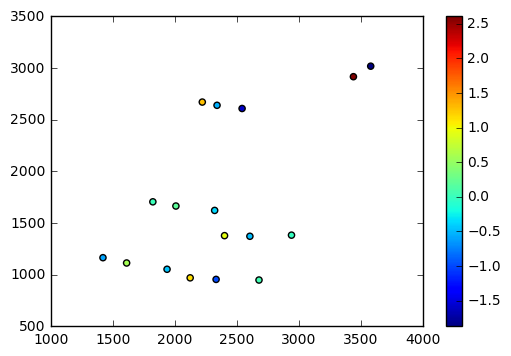

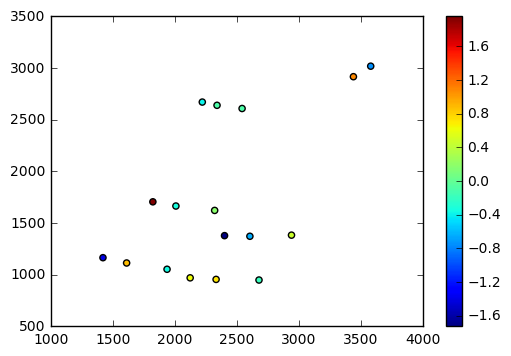

In [20]:
wcs = fun.return_wcs(fit_result.x)
fit_x, fit_y = wcs.all_world2pix(stars['az'], stars['alt'], 0)
plt.scatter(fit_x, fit_y, c=stars['x']-fit_x)
plt.colorbar()
plt.figure()
plt.scatter(fit_x, fit_y, c=stars['y']-fit_y)
plt.colorbar()
print np.median(fit_x-stars['x']), np.std(fit_x-stars['x'])
print np.median(fit_y-stars['y']), np.std(fit_y-stars['y'])

In [21]:
wcs.to_header(relax=True)

WCSAXES =                    2 / Number of coordinate axes                      
CRPIX1  =      2868.3863318937 / Pixel coordinate of reference point            
CRPIX2  =      1986.7223491151 / Pixel coordinate of reference point            
PC1_1   =    0.029167013645227 / Coordinate transformation matrix element       
PC1_2   =   0.0022216560811131 / Coordinate transformation matrix element       
PC2_1   =   0.0025105238225059 / Coordinate transformation matrix element       
PC2_2   =   -0.034960658614948 / Coordinate transformation matrix element       
CDELT1  =      1.2320056475737 / [deg] Coordinate increment at reference point  
CDELT2  =      1.0324748922983 / [deg] Coordinate increment at reference point  
CUNIT1  = 'deg'                / Units of coordinate increment and value        
CUNIT2  = 'deg'                / Units of coordinate increment and value        
CTYPE1  = 'RA---AZP-SIP'       / TAN (gnomonic) projection + SIP distortions    
CTYPE2  = 'DEC--AZP-SIP'    

In [22]:
# WORKED! Now to write it out
header = wcs.to_header(relax=True)
hdu = fits.PrimaryHDU(header=header)
hdu.writeto('wcs_asp_SIP.fits')

In [23]:
x, y = np.meshgrid(np.arange(1000,4000, 1), np.arange(500, 3500, 1))

In [24]:
x = x.ravel()
y = y.ravel()
az, alt = wcs.all_pix2world(x,y, 0)

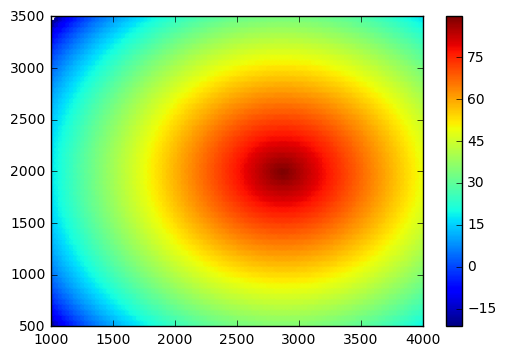

In [25]:
plt.hexbin(x,y, alt)
plt.colorbar()

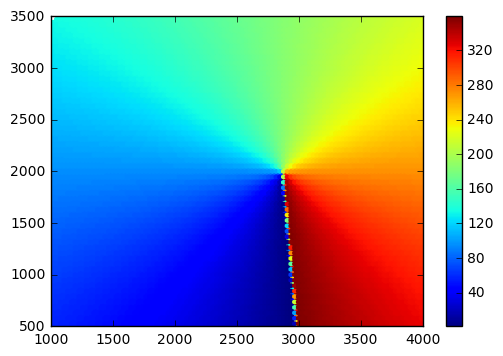

In [26]:
plt.hexbin(x,y, az)
plt.colorbar()